# Checklist
- Data Info
- Data Types
- Missing Values
- Duplicated Values
- Unique Values
- Distributions & Outliers
- Correlations

# Task Details
Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.
In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let'

s embark on

the journey of sales prediction using machine learning in Python.

# Data Source
https://www.kaggle.com/datasets/yashpaloswal/ann-car-sales-price-prediction

# Imports

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
from data_gadgets.cleaning import Cleaner
from data_gadgets.visualization import Visualizer

# Reading Data

In [3]:
path = os.path.join('..', '..', 'data', 'raw', 'data_task4.csv')
data = pd.read_csv(path, encoding='ansi')

In [4]:
data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


# Data Info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


# Data Types

In [6]:
cleaner = Cleaner()
cols = cleaner.separate_data(data, 'car purchase amount')
cols

{'target': ['car purchase amount'],
 'time': [],
 'category': [],
 'category+': ['customer name', 'customer e-mail', 'country'],
 'continuous': [],
 'continuous+': ['age', 'annual Salary', 'credit card debt', 'net worth'],
 'discrete': ['gender']}

# Missing Values

In [7]:
data.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

# Duplicated Values

In [8]:
data.duplicated().sum()

0

# Unique Values

In [9]:
data.nunique()

customer name          498
customer e-mail        500
country                211
gender                   2
age                    500
annual Salary          500
credit card debt       500
net worth              500
car purchase amount    500
dtype: int64

# Distributions

In [10]:
data.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [11]:
visualizer = Visualizer()

## Time

In [12]:
try:
    visualizer.multivariate_subplots(data[cols['continuous+']+cols['time']], cols['time'][0], kind='time')
except:
    pass

## Continuous

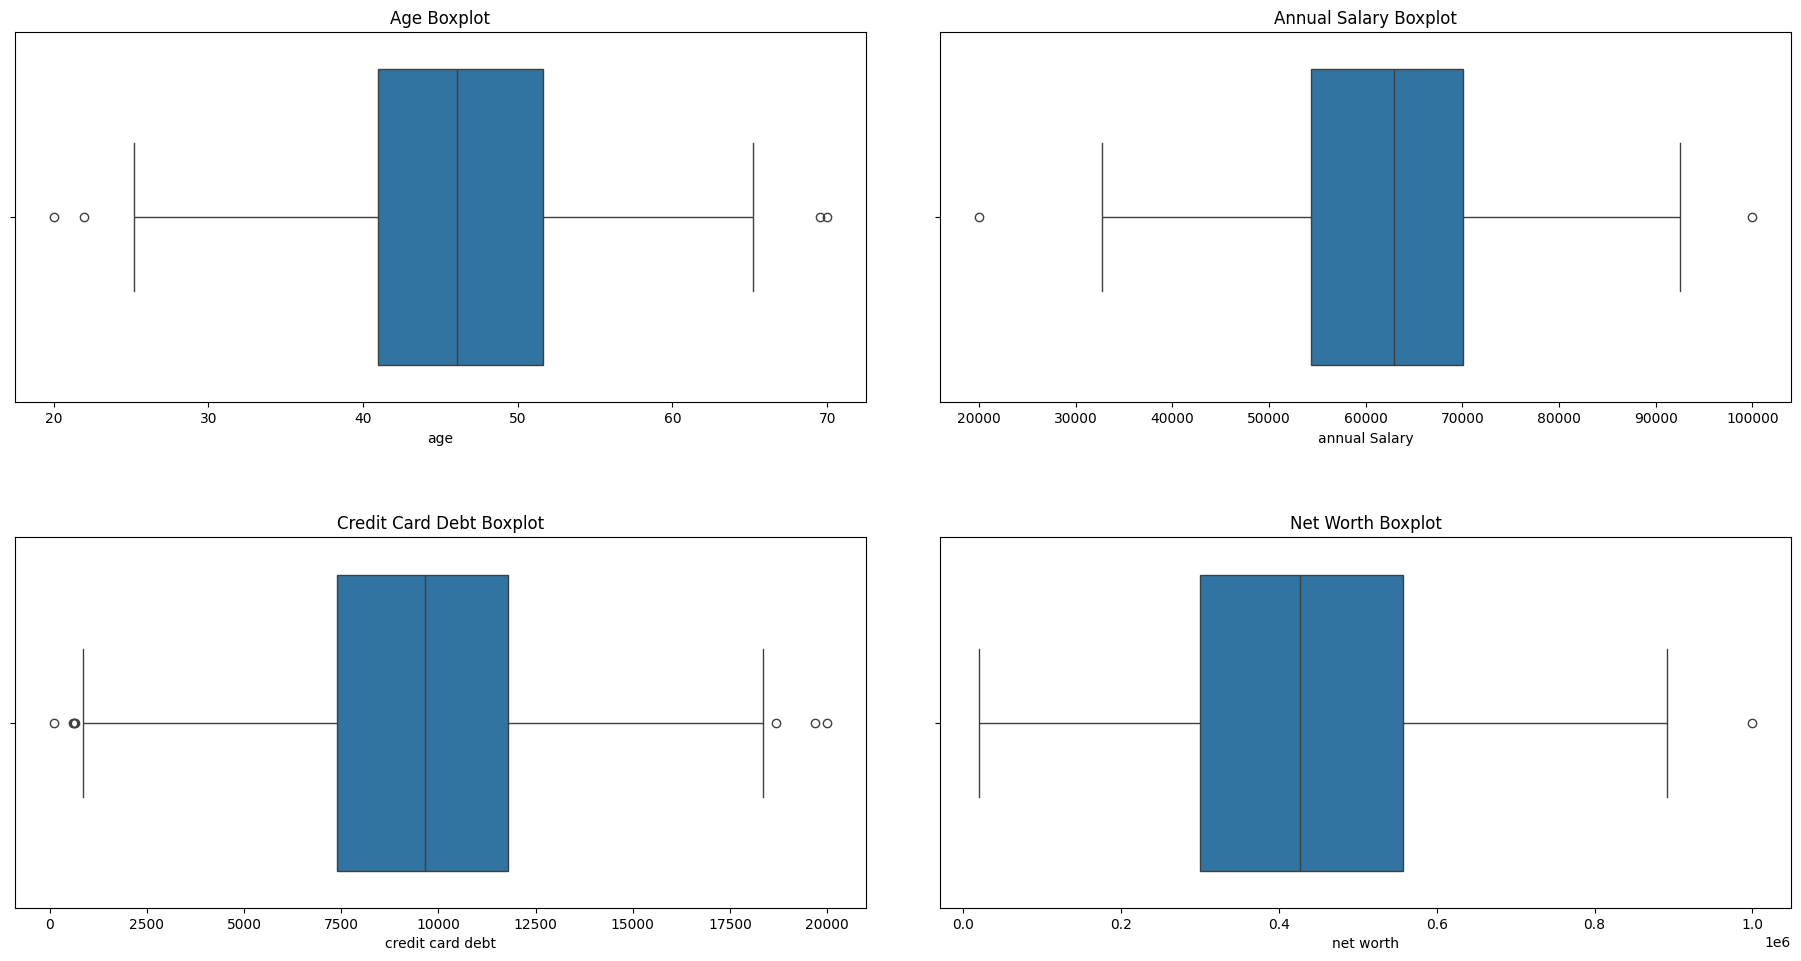

In [13]:
visualizer.univariate_subplots(data[cols['continuous+']], 'boxplot', 2, 2)

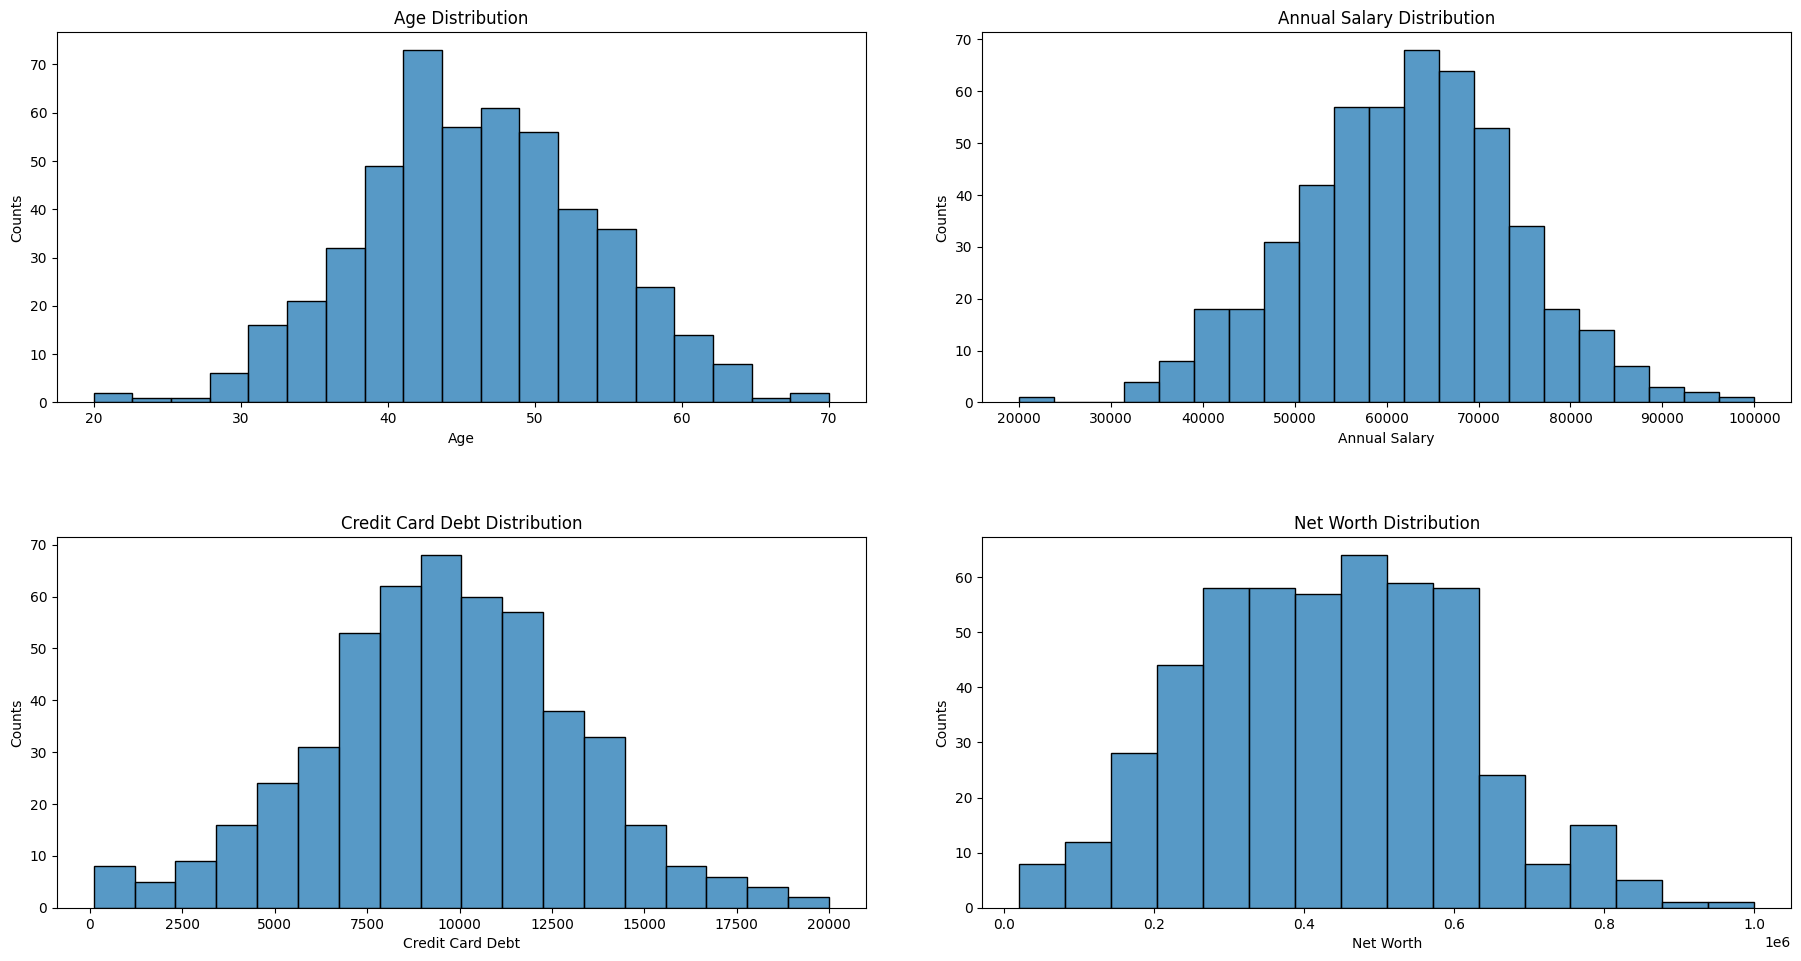

In [14]:
visualizer.univariate_subplots(data[cols['continuous+']], 'numerical_counts', 2, 2)

## Discrete

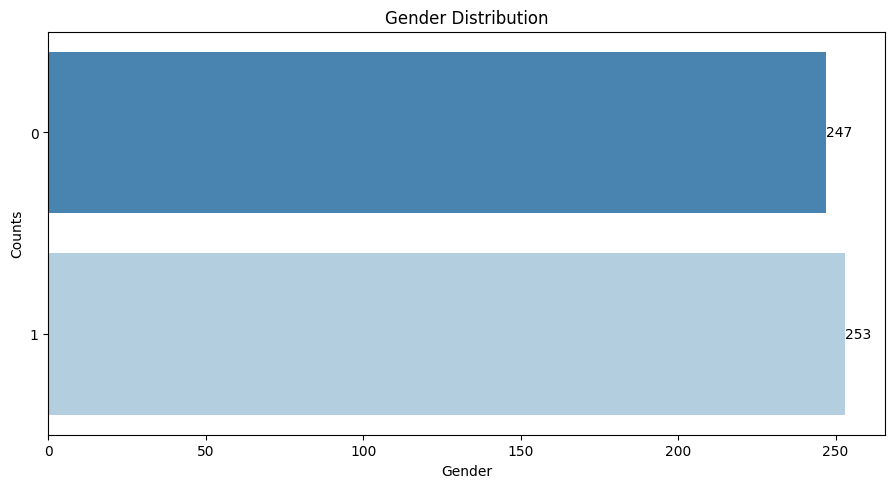

In [15]:
visualizer.univariate_subplots(data[cols['discrete']], 'category_counts', 2, 2)

## Categorical

In [16]:
visualizer.univariate_subplots(data[cols['category']], 'category_counts', 2, 2)

<Figure size 1920x1080 with 0 Axes>

## Target

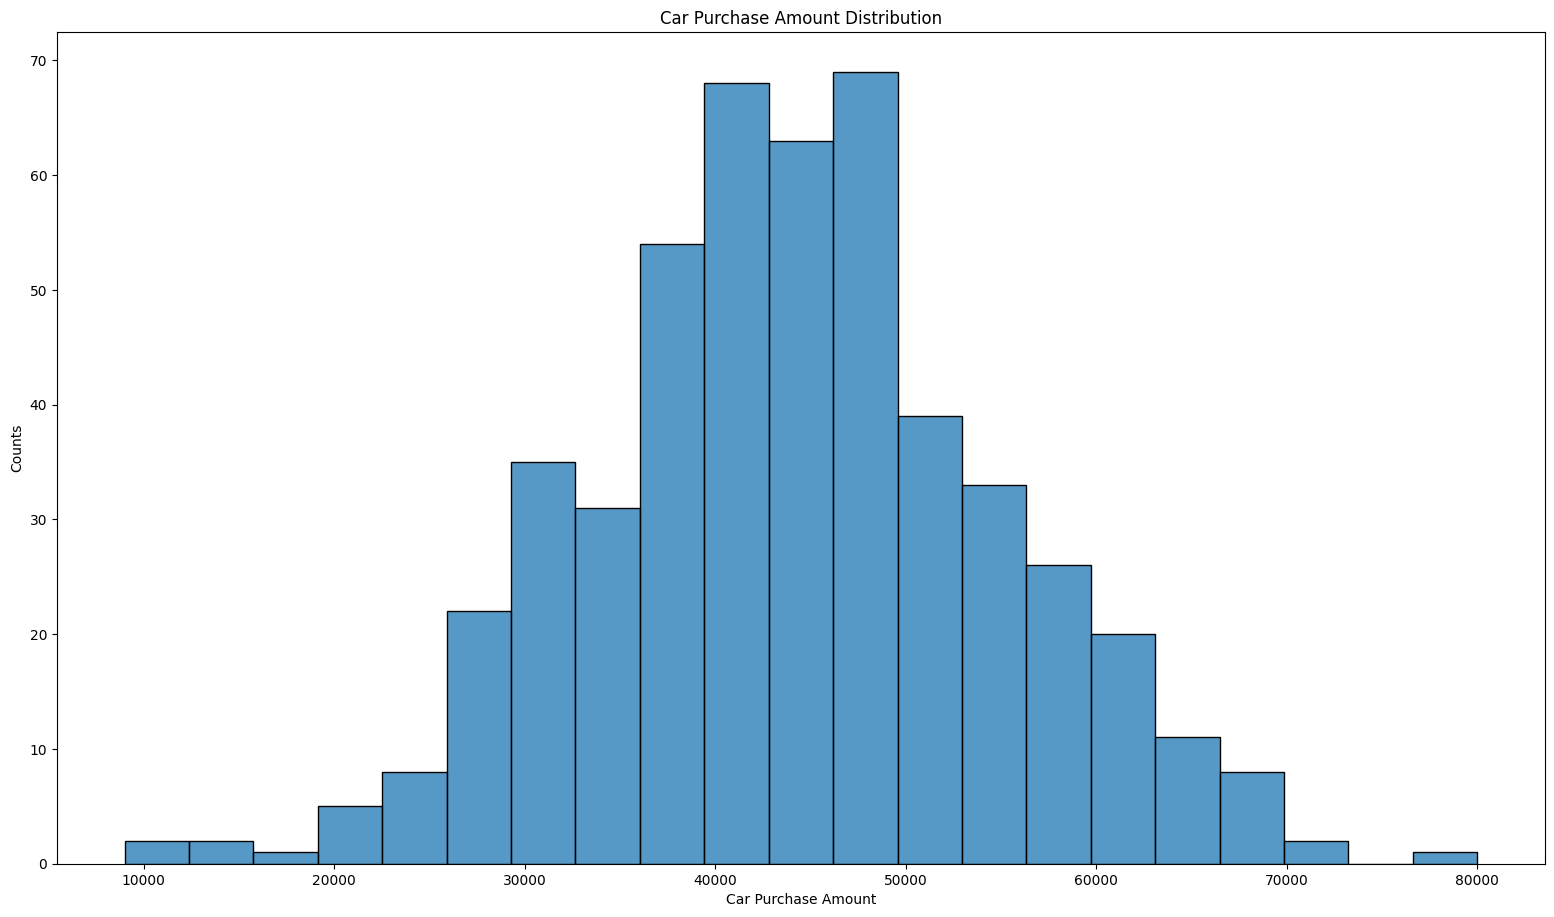

In [17]:
try:
    visualizer.numerical_counts(data, cols['target'][0])
except:
    visualizer.category_counts(data, cols['target'][0])

In [18]:
try:
    visualizer.multivariate_subplots(data[cols['time']+cols['target']], cols['time'][0], kind='time')
except:
    pass

# Correlations

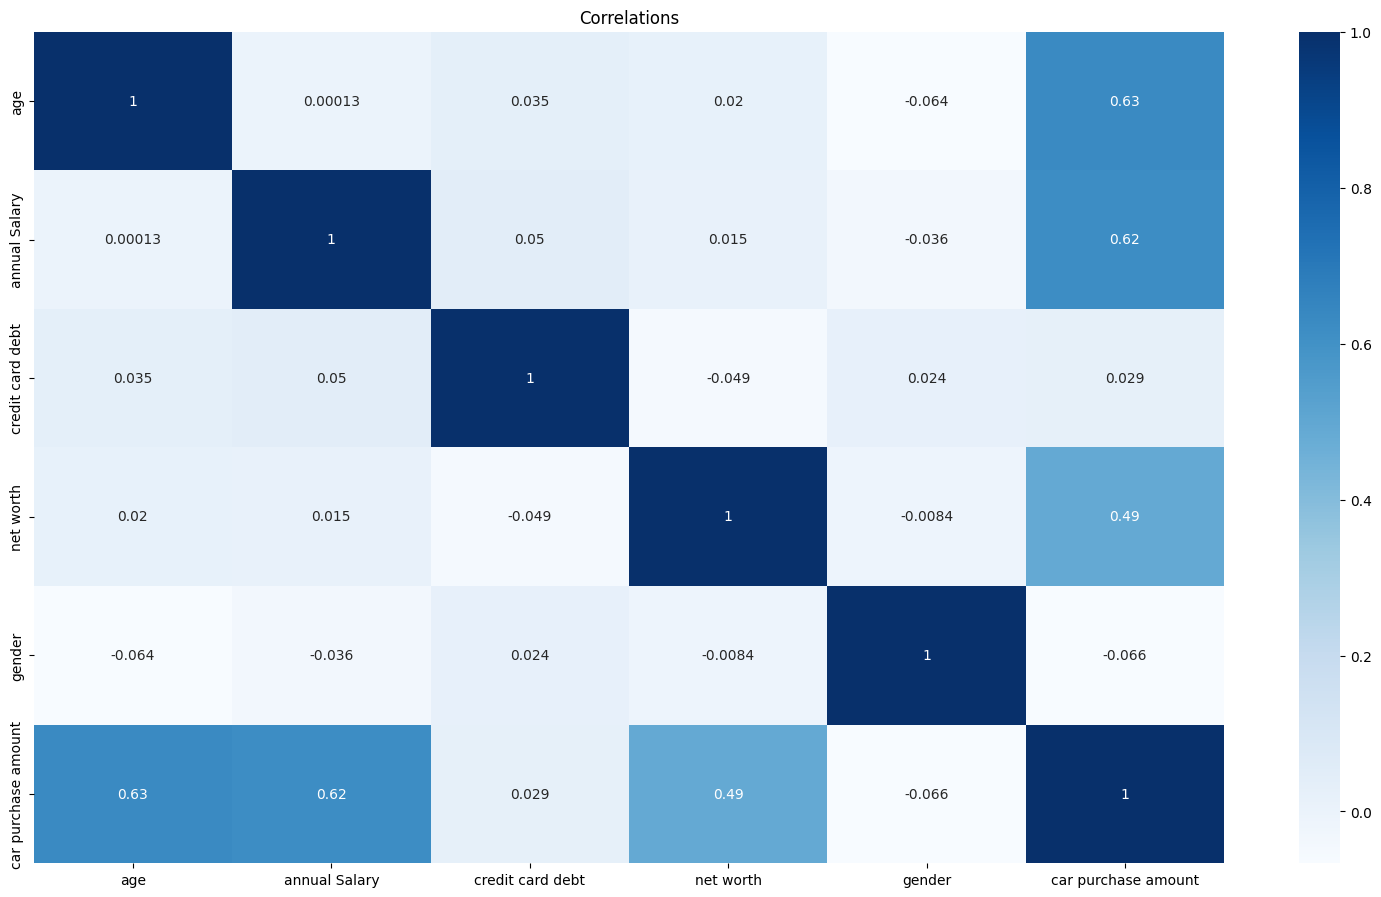

In [19]:
visualizer.correlations(data, cols['continuous+']+cols['discrete']+cols['target'])

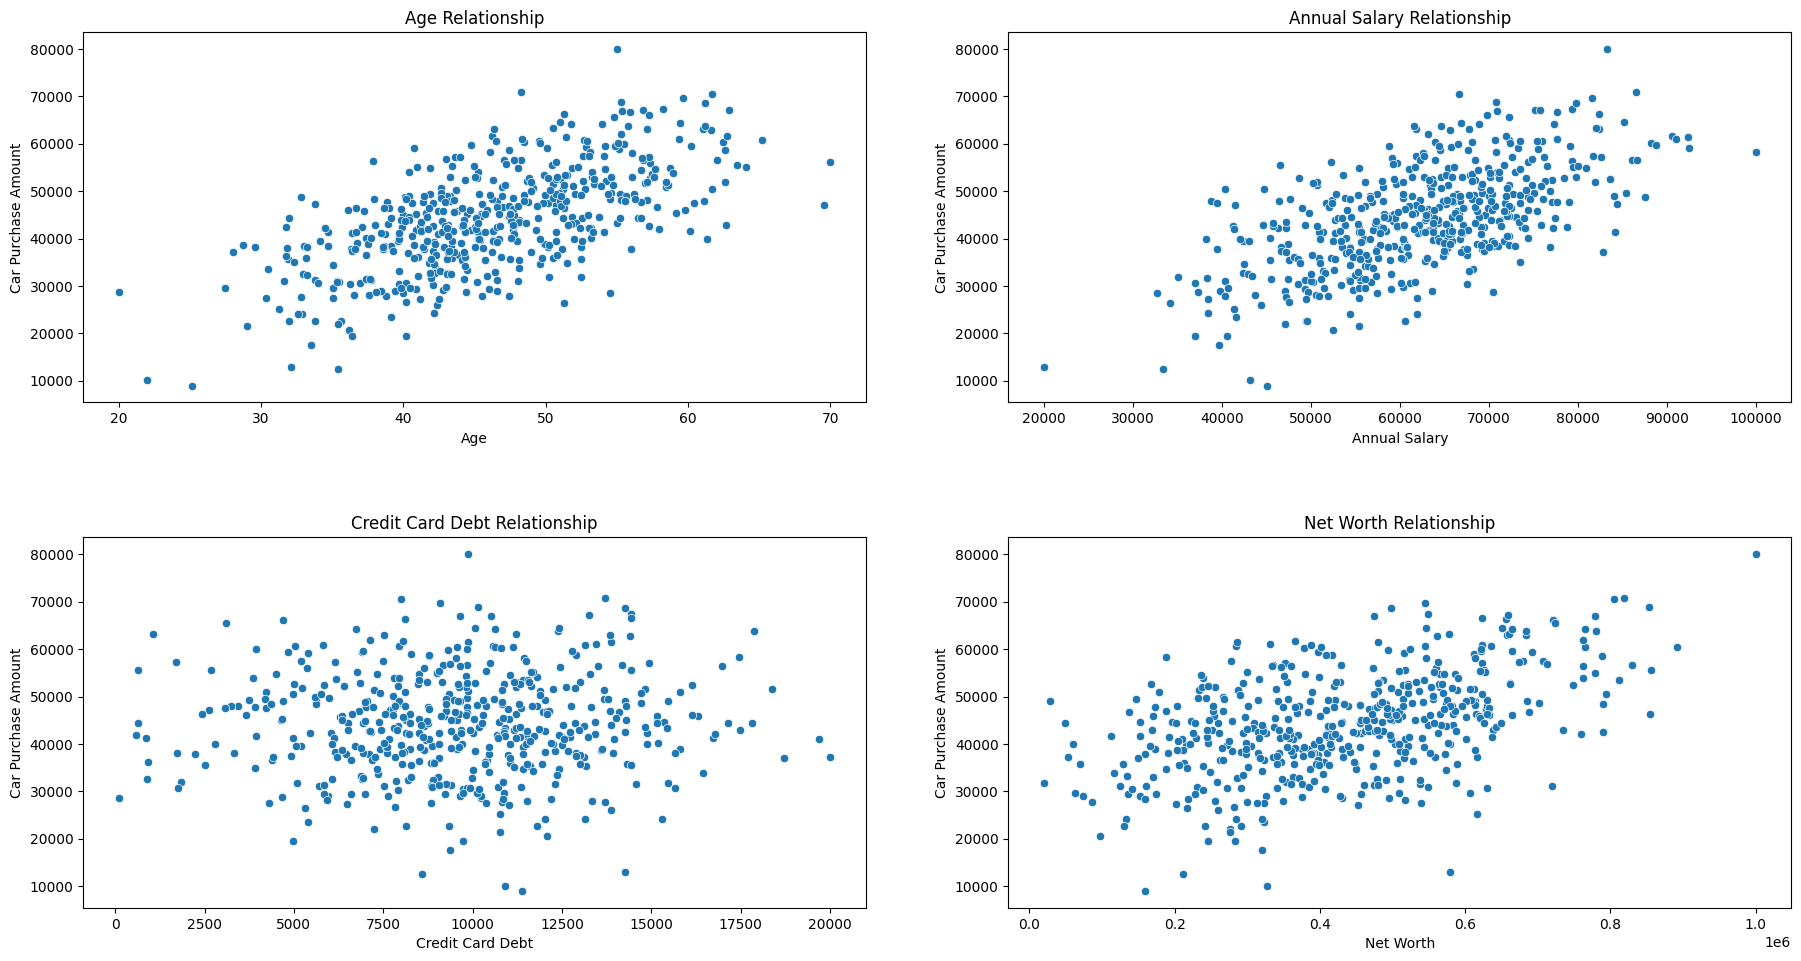

In [20]:
visualizer.multivariate_subplots(data[cols['continuous+']+cols['target']], cols['target'][0], 'relationship', max_rows=2, max_cols=2)

# Conclusion
- Missing Values: None
- Duplicated Values: None
- Notes
    - Customer Name and Email columns can be dropped
    - Are there even 211 countries in the world? Seems so
    - Its weird that there are as many unique values as total values
    - Country column is also not very useful because there are too many unique values